In [1]:
import altair as alt
import pandas as pd

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

CPU times: user 7.51 ms, sys: 0 ns, total: 7.51 ms
Wall time: 7.51 ms


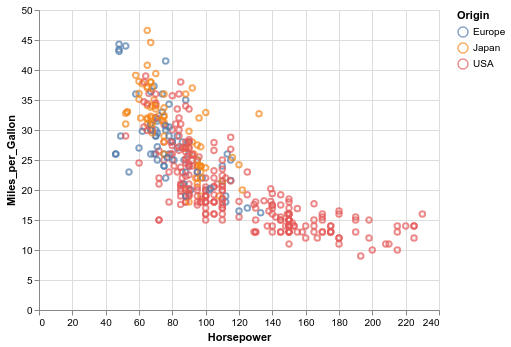

In [3]:
df = pd.read_json('cars.json')

%time alt.Chart(df).mark_point().encode(x='Horsepower', y='Miles_per_Gallon', color='Origin',)

In [4]:
import ipytablewidgets
chart = alt.Chart(df).mark_point().encode(
    x='Horsepower', 
    y='Miles_per_Gallon',
    color='Origin',
)

In [5]:
from vega.altair import stream
from vega.widget import VegaWidget

alt.data_transformers.enable('streaming')
from pprint import pprint
pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.8.1.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
 'data': {'name': 'data'},
 'encoding': {'color': {'field': 'Origin', 'type': 'nominal'},
              'x': {'field': 'Horsepower', 'type': 'quantitative'},
              'y': {'field': 'Miles_per_Gallon', 'type': 'quantitative'}},
 'mark': 'point'}


In [6]:
widget = VegaWidget(spec=chart.to_dict())
display(widget)
%time widget.update('data', insert=df)

VegaWidget()

CPU times: user 3.88 ms, sys: 0 ns, total: 3.88 ms
Wall time: 3.38 ms


In [7]:
stream(chart)

VegaWidget()

In [8]:

from vega_datasets import data

source = data.wheat()
threshold = pd.DataFrame([{"threshold": 90}])

bars = alt.Chart(source).mark_bar().encode(
    x="year:O",
    y="wheat:Q",
)

highlight = alt.Chart(source).mark_bar(color="#e45755").encode(
    x='year:O',
    y='baseline:Q',
    y2='wheat:Q'
).transform_filter(
    alt.datum.wheat > 90
).transform_calculate("baseline", "90")

rule = alt.Chart(threshold).mark_rule().encode(
    y='threshold:Q'
)

chart = (bars + highlight + rule).properties(width=600)


In [9]:
with alt.data_transformers.enable('streaming', context={}):
    pprint(chart.to_dict())

{'$schema': 'https://vega.github.io/schema/vega-lite/v4.8.1.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 400}},
 'data': {'name': 'data'},
 'layer': [{'encoding': {'x': {'field': 'year', 'type': 'ordinal'},
                         'y': {'field': 'wheat', 'type': 'quantitative'}},
            'mark': 'bar'},
           {'encoding': {'x': {'field': 'year', 'type': 'ordinal'},
                         'y': {'field': 'baseline', 'type': 'quantitative'},
                         'y2': {'field': 'wheat'}},
            'mark': {'color': '#e45755', 'type': 'bar'},
            'transform': [{'filter': '(datum.wheat > 90)'},
                          {'as': 'baseline', 'calculate': '90'}]},
           {'data': {'name': 'data-2'},
            'encoding': {'y': {'field': 'threshold', 'type': 'quantitative'}},
            'mark': 'rule'}],
 'width': 600}


In [10]:
# The streaming API overrides the default transformer
alt.data_transformers.enable('default')

DataTransformerRegistry.enable('default')

In [11]:
stream(chart, debug=True)

to_streaming 140698982719648
to_streaming 140701792885008


VegaWidget()

In [12]:
# Do not stream the threshold table, inlining it is fine
stream(chart, exceptions=[threshold], debug=True)

to_streaming 140698982719648
to_streaming 140701792885008
Exception for 140701792885008


VegaWidget()

In [13]:
from vega.altair import test_altair
test_altair()

wheat_wages


VegaWidget()

seattle_weather_interactive


VegaWidget()

selection_layer_bar_month


VegaWidget()

parallel_coordinates


VegaWidget()

top_k_with_others


VegaWidget()

isotype


VegaWidget()

table_bubble_plot_github


VegaWidget()

area_chart_gradient


VegaWidget()

bar_chart_horizontal


VegaWidget()

histogram_responsive


VegaWidget()

poly_fit_regression
Error name 'base' is not defined
normalized_stacked_area_chart


VegaWidget()

select_detail


VegaWidget()

world_projections
Error name 'base' is not defined
top_k_items


VegaWidget()

airports_count


VegaWidget()

interactive_cross_highlight


VegaWidget()

scatter_with_layered_histogram


VegaWidget()

interactive_layered_crossfilter


VegaWidget()

layered_histogram


VegaWidget()

multifeature_scatter_plot


VegaWidget()

choropleth


VegaWidget()

ridgeline_plot


VegaWidget()

scatter_tooltips


VegaWidget()

stacked_bar_chart_sorted_segments


VegaWidget()

simple_scatter_with_errorbars


VegaWidget()

sorted_error_bars_with_ci


VegaWidget()

bar_chart_with_mean_line


VegaWidget()

horizontal_stacked_bar_chart


VegaWidget()

scatter_href


VegaWidget()

errorbars_with_std


VegaWidget()

line_chart_with_generator


VegaWidget()

filled_step_chart


VegaWidget()

boxplot


VegaWidget()

simple_histogram


VegaWidget()

us_employment


VegaWidget()

co2_concentration


VegaWidget()

gantt_chart


VegaWidget()

multiple_interactions


VegaWidget()

anscombe_plot


VegaWidget()

us_population_pyramid_over_time


VegaWidget()

isotype_grid


VegaWidget()

slope_graph


VegaWidget()

london_tube


VegaWidget()

top_k_letters


VegaWidget()

candlestick_chart
Error No dataset named 'ohlc'
grouped_bar_chart_horizontal


VegaWidget()

normalized_stacked_bar_chart


VegaWidget()

simple_bar_chart


VegaWidget()

scatter_with_histogram


VegaWidget()

scatter_qq


VegaWidget()

one_dot_per_zipcode


VegaWidget()

scatter_with_rolling_mean


VegaWidget()

dot_dash_plot


VegaWidget()

bar_rounded


VegaWidget()

bar_and_line_with_dual_axis


VegaWidget()

bar_chart_with_highlighted_bar


VegaWidget()

scatter_marginal_hist


VegaWidget()

cumulative_count_chart


VegaWidget()

us_incomebrackets_by_state_facet


VegaWidget()

bubble_plot


VegaWidget()

scatter_with_labels


VegaWidget()

grouped_bar_chart


VegaWidget()

multiline_tooltip


VegaWidget()

line_percent


VegaWidget()

window_rank


VegaWidget()

airports


VegaWidget()

strip_plot


VegaWidget()

simple_heatmap


VegaWidget()

bar_chart_sorted


VegaWidget()

cumulative_wiki_donations


VegaWidget()

density_stack


VegaWidget()

trellis_histogram


VegaWidget()

simple_line_chart


VegaWidget()

stacked_bar_chart


VegaWidget()

simple_stacked_area_chart


VegaWidget()

layer_line_color_rule


VegaWidget()

selection_histogram


VegaWidget()

us_state_capitals


VegaWidget()

trellis_area


VegaWidget()

step_chart


VegaWidget()

isotype_emoji


VegaWidget()

grouped_bar_chart_with_error_bars


VegaWidget()

scatter_linked_brush


VegaWidget()

scatter_with_minimap


VegaWidget()

layered_bar_chart


VegaWidget()

airport_connections


VegaWidget()

iowa_electricity


VegaWidget()

streamgraph


VegaWidget()

trellis_scatter_plot


VegaWidget()

diverging_stacked_bar_chart


VegaWidget()

errorbars_with_ci


VegaWidget()

beckers_barley_trellis_plot


VegaWidget()

trellis_stacked_bar_chart


VegaWidget()

beckers_barley_wrapped_facet


VegaWidget()

layered_chart_bar_mark


VegaWidget()

multi_series_line


VegaWidget()

choropleth_repeat


VegaWidget()

scatter_with_loess


VegaWidget()

interactive_brush


VegaWidget()

interactive_scatter_plot


VegaWidget()

histogram_with_a_global_mean_overlay


VegaWidget()

world_map


VegaWidget()

trellis_area_sort_array


VegaWidget()

stripplot


VegaWidget()

bar_chart_with_labels


VegaWidget()

scatter_matrix


VegaWidget()

weather_heatmap


VegaWidget()

horizon_graph


VegaWidget()

gapminder_bubble_plot


VegaWidget()

violin_plot


VegaWidget()

connected_scatterplot


VegaWidget()

stem_and_leaf


VegaWidget()

binned_scatterplot


VegaWidget()

us_population_over_time_facet


VegaWidget()

select_mark_area


VegaWidget()

ranged_dot_plot


VegaWidget()

interval_selection


VegaWidget()

falkensee


VegaWidget()

line_chart_with_points


VegaWidget()

interactive_legend


VegaWidget()

natural_disasters


VegaWidget()

wilkinson-dot-plot


VegaWidget()

multiline_highlight


VegaWidget()

line_with_ci


VegaWidget()

binned_heatmap


VegaWidget()

bar_chart_with_highlighted_segment


VegaWidget()

density_facet


VegaWidget()

multiple_marks


VegaWidget()

layered_area_chart


VegaWidget()

layered_heatmap_text


VegaWidget()

percentage_of_total


VegaWidget()

layered_chart_with_dual_axis


VegaWidget()

scatter_linked_table


VegaWidget()

stacked_bar_chart_with_text


VegaWidget()

trail_marker


VegaWidget()

bar_chart_with_negatives


VegaWidget()

us_population_over_time


VegaWidget()

normed_parallel_coordinates


VegaWidget()

{'candlestick_chart': "No dataset named 'ohlc'",
 'poly_fit_regression': "name 'base' is not defined",
 'world_projections': "name 'base' is not defined"}
